In [1]:
import pandas as pd
import numpy as np

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ted = pd.read_csv('ted.csv')

## 1. Show installed versions

In [3]:
pd.__version__

'1.2.4'

In [4]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.8.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.117
Version          : #1 SMP Wed Jul 7 23:07:42 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.2.4
numpy            : 1.19.5
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.1.2
setuptools       : 57.0.0
Cython           : None
pytest           : 6.2.2
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : 1.0.2
psycopg2         : 2.8.6 (dt dec pq3 ext lo64)
jinja2           : 3.0.1
IPython          : 7.24.1
pandas_datareader: 0.9.0
bs4              : 4.9.3
bottleneck       : None

## 2. Create an example DataFrame

In [10]:
df = pd.DataFrame({'col one':[100,200],'col two':[300,400] })
df

,col one,col two
0,100,300
1,200,400


In [4]:
df2=pd.DataFrame([{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}])
df2

,id,name,count
0,7,Funny,19645
1,1,Beautiful,4573
2,9,Ingenious,6073
3,3,Courageous,3253
4,11,Longwinded,387
5,2,Confusing,242
6,8,Informative,7346
7,22,Fascinating,10581
8,21,Unconvincing,300
9,24,Persuasive,10704


In [7]:
pd.DataFrame(np.random.rand(4,8), columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.747845,0.389567,0.761477,0.073296,0.774145,0.111154,0.541005,0.079160
1,0.623541,0.269807,0.220761,0.977543,0.129350,0.416631,0.260164,0.991660
2,0.620086,0.607374,0.902232,0.742745,0.777660,0.348933,0.767756,0.798205
3,0.824868,0.180726,0.053093,0.503122,0.632506,0.703219,0.052955,0.866162


## 3. Rename columns

In [17]:
df = pd.DataFrame({'col one':[100,200],'col two':[300,400] })
df

,col one,col two
0,100,300
1,200,400


In [13]:
df.rename({'col one':'col_one','col two':'col_two'}, axis='columns')

,col_one,col_two
0,100,300
1,200,400


In [15]:
df.columns = ['col_one', 'col_two']
df

,col_one,col_two
0,100,300
1,200,400


In [18]:
df.columns = df.columns.str.replace(' ','_')
df

,col_one,col_two
0,100,300
1,200,400


In [19]:
df.add_suffix('_Z').add_prefix('X_')

,X_col_one_Z,X_col_two_Z
0,100,300
1,200,400


## 4. Reverse row order

In [21]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [24]:
drinks.loc[::-1].reset_index(drop=True)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64,18,4,4.7,Africa
1,Zambia,32,19,4,2.5,Africa
2,Yemen,6,0,0,0.1,Asia
3,Vietnam,111,2,1,2.0,Asia
4,Venezuela,333,100,3,7.7,South America
...,...,...,...,...,...,...
188,Angola,217,57,45,5.9,Africa
189,Andorra,245,138,312,12.4,Europe
190,Algeria,25,0,14,0.7,Africa
191,Albania,89,132,54,4.9,Europe


## 5. Reverse column order

In [25]:
drinks.loc[:,::-1]

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,Asia,0.0,0,0,0,Afghanistan
1,Europe,4.9,54,132,89,Albania
2,Africa,0.7,14,0,25,Algeria
3,Europe,12.4,312,138,245,Andorra
4,Africa,5.9,45,57,217,Angola
...,...,...,...,...,...,...
188,South America,7.7,3,100,333,Venezuela
189,Asia,2.0,1,2,111,Vietnam
190,Asia,0.1,0,0,6,Yemen
191,Africa,2.5,4,19,32,Zambia


## 6. Select columns by data type

In [26]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [28]:
drinks.select_dtypes(include='number').head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [30]:
drinks.select_dtypes(exclude=['int64','float64']).head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


## 7. Convert strings to numbers

In [31]:
df = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                   'col_two':['4.4', '5.5', '6.6'],
                   'col_three':['7.7', '8.8', '-']})
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,-


In [32]:
df.apply(pd.to_numeric, errors='coerce').fillna(0)

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,0.0


## 8. Reduce DataFrame size

In [36]:
small_drinks = pd.read_csv('http://bit.ly/drinksbycountry')
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [39]:
cols=['beer_servings','continent']
pd.read_csv('http://bit.ly/drinksbycountry', usecols=cols, dtype={'continent':'category'}).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   beer_servings  193 non-null    int64   
 1   continent      193 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.4 KB


## 9. Build a DataFrame from multiple files (row-wise)

In [40]:
pd.read_csv('data/stocks1.csv')

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT


In [41]:
from glob import glob

In [47]:
files=sorted(glob('data/stocks*.csv'))
pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL
9,2016-10-03,31.50,14070500,CSCO


## 10. Build a DataFrame from multiple files (column-wise)

In [48]:
pd.read_csv('data/drinks1.csv').head()

,country,beer_servings,spirit_servings
0,Afghanistan,0,0
1,Albania,89,132
2,Algeria,25,0
3,Andorra,245,138
4,Angola,217,57


In [51]:
files=sorted(glob('data/drinks*.csv'))
pd.concat((pd.read_csv(file) for file in files), axis='columns').head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa,Angola,217,57,45,5.9,Africa


## 11. Create a DataFrame from the clipboard

## 12. Split a DataFrame into two random subsets

In [56]:
len(movies)

979

In [57]:
movies1 = movies.sample(frac=0.75, random_state=1234)
movies2 = movies.drop(movies1.index)
len(movies1)+len(movies2)

979

In [61]:
movies1.index.sort_values()

Int64Index([  0,   2,   5,   6,   7,   8,   9,  11,  13,  16,
            ...
            966, 967, 969, 971, 972, 974, 975, 976, 977, 978],
           dtype='int64', length=734)

In [60]:
movies2.index.sort_values()

Int64Index([  1,   3,   4,  10,  12,  14,  15,  18,  26,  30,
            ...
            931, 934, 937, 941, 950, 954, 960, 968, 970, 973],
           dtype='int64', length=245)

## 13. Filter a DataFrame by multiple categories

In [62]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [63]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [66]:
movies[movies.genre.isin(['Animation','Comedy'])]

,star_rating,title,content_rating,genre,duration,actors_list
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
48,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,PG,Comedy,95,"[u'Peter Sellers', u'George C. Scott', u'Sterl..."
...,...,...,...,...,...,...
960,7.4,The Way Way Back,PG-13,Comedy,103,"[u'Steve Carell', u'Toni Collette', u'Allison ..."
962,7.4,Driving Miss Daisy,PG,Comedy,99,"[u'Morgan Freeman', u'Jessica Tandy', u'Dan Ay..."
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."


In [67]:
movies[~movies.genre.isin(['Animation','Comedy'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## 14. Filter a DataFrame by largest categories

In [68]:
counts = movies.genre.value_counts()
counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [69]:
counts.nlargest(3)

Drama     278
Comedy    156
Action    136
Name: genre, dtype: int64

In [71]:
movies[movies.genre.isin(counts.nlargest(3).index)].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


## 15. Handle missing values

In [72]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [73]:
ufo.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         City  Colors Reported  Shape Reported  State   Time
0      False             True           False  False  False
1      False             True           False  False  False
2      False             True           False  False  False
3      False             True           False  False  False
4      False             True           False  False  False
...      ...              ...             ...    ...    ...
18236  False             True           False  False  False
18237  False             True           False  False  False
18238  False             True            True  False  False
18239  False            False           False  False  False
18240  False             True           False  False  False

[18241 rows x 5 columns]>

In [74]:
ufo.isna().mean()

City               0.001371
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

In [75]:
ufo.dropna(axis='columns')

,State,Time
0,NY,1930-06-01 22:00:00
1,NJ,1930-06-30 20:00:00
2,CO,1931-02-15 14:00:00
3,KS,1931-06-01 13:00:00
4,NY,1933-04-18 19:00:00
...,...,...
18236,IL,2000-12-31 23:00:00
18237,IA,2000-12-31 23:00:00
18238,WI,2000-12-31 23:45:00
18239,WI,2000-12-31 23:45:00


In [77]:
ufo.dropna(thresh=len(ufo)*0.9, axis='columns')

,City,State,Time
0,Ithaca,NY,1930-06-01 22:00:00
1,Willingboro,NJ,1930-06-30 20:00:00
2,Holyoke,CO,1931-02-15 14:00:00
3,Abilene,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NY,1933-04-18 19:00:00
...,...,...,...
18236,Grant Park,IL,2000-12-31 23:00:00
18237,Spirit Lake,IA,2000-12-31 23:00:00
18238,Eagle River,WI,2000-12-31 23:45:00
18239,Eagle River,WI,2000-12-31 23:45:00


## 16. Split a string into multiple columns

In [78]:
df = pd.DataFrame({'name':['John Arthur Doe', 'Jane Ann Smith'],
                   'location':['Los Angeles, CA', 'Washington, DC']})
df

,name,location
0,John Arthur Doe,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"


In [80]:
df[['first','middle','last']] = df.name.str.split(' ', expand=True)
df

,name,location,first,middle,last
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith


In [82]:
df['city'] = df.location.str.split(',', expand=True)[0]
df

,name,location,first,middle,last,city
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe,Los Angeles
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith,Washington


In [83]:
df.location.str.split(',', expand=True)

,0,1
0,Los Angeles,CA
1,Washington,DC


## 17. Expand a Series of lists into a DataFrame

In [85]:
df = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


In [87]:
df_new = df.col_two.apply(pd.Series)
pd.concat([df, df_new], axis='columns')

,col_one,col_two,0,1
0,a,"[10, 40]",10,40
1,b,"[20, 50]",20,50
2,c,"[30, 60]",30,60


## 18. Aggregate by multiple functions

In [90]:
orders.head(6)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98


In [95]:
orders[orders.order_id==1].item_price.sum()

11.56

In [96]:
orders.groupby('order_id').item_price.agg(['sum','count']).head()

,sum,count
order_id,,
1,11.56,4
2,16.98,1
3,12.67,2
4,21.00,2
5,13.70,2


## 19. Combine the output of an aggregation with a DataFrame

In [108]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [109]:
orders['total'] = orders.groupby('order_id').item_price.transform(sum)
orders

,order_id,quantity,item_name,choice_description,item_price,total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,23.50
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,23.50
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,28.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,28.75


In [110]:
orders['percent_of_total']=orders.item_price/orders.total
orders.head()

,order_id,quantity,item_name,choice_description,item_price,total,percent_of_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,0.206747
1,1,1,Izze,[Clementine],3.39,11.56,0.293253
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,0.293253
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56,0.206747
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,1.000000


## 20. Select a slice of rows and columns

In [113]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
titanic.describe().loc['min':'max','Pclass':'Parch']

,Pclass,Age,SibSp,Parch
min,1.0,0.420,0.0,0.0
25%,2.0,20.125,0.0,0.0
50%,3.0,28.000,0.0,0.0
75%,3.0,38.000,1.0,0.0
max,3.0,80.000,8.0,6.0


## 21. Reshape a MultiIndexed Series

In [116]:
titanic.Survived.mean()

0.3838383838383838

In [120]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 22. Create a pivot table

In [121]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


## 23. Convert continuous data into categorical data

In [122]:
titanic.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [130]:
titanic['age_group'] = pd.cut(titanic.Age, bins=[0,14,50,99], labels=['young','young-adult','adult'])
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S,young-adult
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,young-adult
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,young-adult
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,young-adult
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S,young-adult


## 24. Change display options

In [131]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young-adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young-adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young-adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young-adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young-adult


In [132]:
pd.set_option('display.float_format', '{:.2f}'.format)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,young-adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,young-adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,young-adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,young-adult
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,young-adult


In [133]:
pd.reset_option('display.float_format')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young-adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young-adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young-adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young-adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young-adult


## 25. Style a DataFrame

In [134]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [138]:
stocks.style.format({'Date':'{:%m/%d/%y}','Close':'${:.2f}','Volume':'{:,}'}).hide_index().set_caption('Awesome DataFrame')

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


## 26. Which TED talks provoke the most online discussion?

In [141]:
ted.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [143]:
ted['views_per_comments'] = ted.views / ted.comments
ted.sort_values('views_per_comments').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comments
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,735.525682


## 27. Visualize the distribution of comments

<AxesSubplot:ylabel='Frequency'>

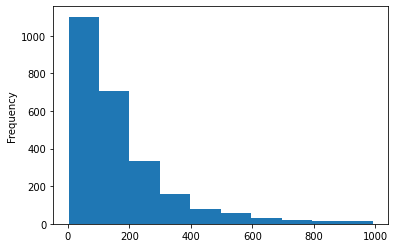

In [147]:
%matplotlib inline
ted[ted.comments<1000].comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

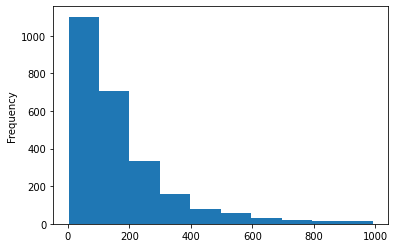

In [145]:
ted.query('comments<1000').comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

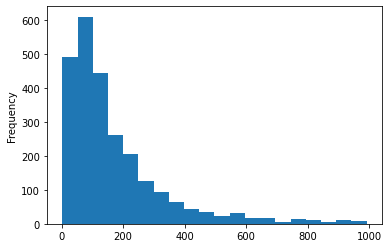

In [150]:
ted.loc[ted.comments<1000,'comments'].plot(kind='hist', bins=20)

In [153]:
ted[ted.comments>1000].shape

(31, 18)

## 28. Plot the number of talks that took place each year

In [154]:
ted.sample()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comments
1934,45,Shimpei Takahashi always dreamed of designing ...,340,TEDxTokyo,1369958400,29,Shimpei Takahashi,Shimpei Takahashi: Play this word game to come...,1,1426172242,"[{'id': 7, 'name': 'Funny', 'count': 343}, {'i...","[{'id': 1692, 'hero': 'https://pe.tedcdn.com/i...",Toy designer,"['TEDx', 'creativity', 'design', 'gaming', 'toy']",Play this word game to come up with original i...,https://www.ted.com/talks/shimpei_takahashi_pl...,1550060,34445.777778


In [156]:
ted['film_datetime'] = ted.film_date.apply(pd.to_datetime, unit='s')
ted.film_datetime.dt.year.value_counts().sort_index()

<AxesSubplot:>

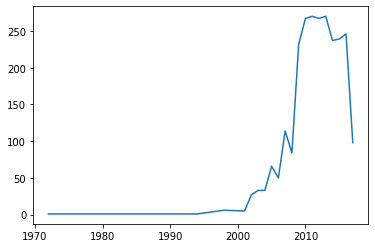

In [174]:
ted.film_datetime.dt.year.value_counts().sort_index().plot()

## 29. What were the "best" events in TED history to attend?

In [170]:
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


## 30. Unpack the ratings data

In [171]:
ted.sample()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comments,film_datetime
2008,78,"In 2011, the US Armed Forces still had a ban o...",685,TEDWomen 2015,1432857600,22,Gayle Tzemach Lemmon,Gayle Tzemach Lemmon: Meet the women fighting ...,1,1435849291,"[{'id': 1, 'name': 'Beautiful', 'count': 160},...","[{'id': 1013, 'hero': 'https://pe.tedcdn.com/i...",Reporter,"['peace', 'war', 'women']",Meet the women fighting on the front lines of ...,https://www.ted.com/talks/gayle_tzemach_lemmon...,1139487,14608.807692,2015-05-29


In [173]:
import ast
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

## 31. Count the total number of ratings received by each talk

In [192]:
pd.DataFrame(ted.ratings_list[0])

,id,name,count
0,7,Funny,19645
1,1,Beautiful,4573
2,9,Ingenious,6073
3,3,Courageous,3253
4,11,Longwinded,387
5,2,Confusing,242
6,8,Informative,7346
7,22,Fascinating,10581
8,21,Unconvincing,300
9,24,Persuasive,10704


In [190]:
pd.DataFrame(ted.ratings_list[0]).sum()

id                                                     192
name     FunnyBeautifulIngeniousCourageousLongwindedCon...
count                                                93850
dtype: object

In [182]:
ted['num_ratings'] = ted.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum())

## 32. Which occupations deliver the funniest TED talks on average?

In [185]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']    

In [186]:
get_funny_ratings(ted.ratings_list[0])

19645

In [193]:
ted.ratings_list.apply(get_funny_ratings)

0       19645
1         544
2         964
3          59
4        1390
        ...  
2545        1
2546       20
2547        1
2548       63
2549        0
Name: ratings_list, Length: 2550, dtype: int64

In [194]:
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)

In [196]:
ted.funny_ratings / ted.num_ratings

0       0.209323
1       0.185286
2       0.341360
3       0.015826
4       0.054254
          ...   
2545    0.005208
2546    0.132450
2547    0.007353
2548    0.108062
2549    0.000000
Length: 2550, dtype: float64

In [197]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [204]:
occupation_count = ted.speaker_occupation.value_counts()
occupation_count

Writer                                      45
Designer                                    34
Artist                                      34
Journalist                                  33
Entrepreneur                                31
                                            ..
Mobile finance entrepreneur                  1
Animal rights lawyer                         1
Newspaper designer                           1
Security consultant                          1
Interaction designer; software developer     1
Name: speaker_occupation, Length: 1458, dtype: int64

In [208]:
top_occupation_count = occupation_count[occupation_count >= 5]
top_occupation_count

Writer                                        45
Designer                                      34
Artist                                        34
Journalist                                    33
Entrepreneur                                  31
                                              ..
Surgeon                                        5
Chef                                           5
Sound consultant                               5
Investor and advocate for moral leadership     5
Game designer                                  5
Name: speaker_occupation, Length: 68, dtype: int64

In [216]:
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupation_count.index)]
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
                                                ...   
Data scientist                                0.184076
Producer                                      0.202531
Singer/songwriter                             0.252205
Performance poet, multimedia artist           0.306468
Comedian                                      0.512457
Name: funny_rate, Length: 68, dtype: float64